## CHAPTER 4: SKEWNESS

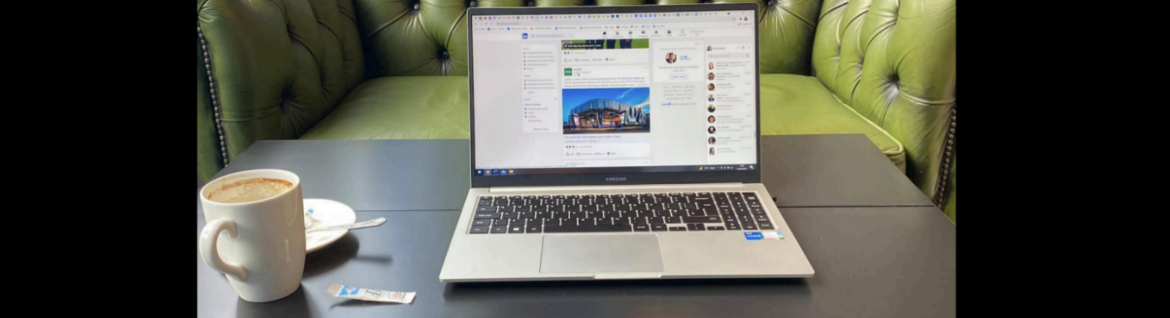

#### Hemant Thapa

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt
import statistics as st
import statsmodels.api as sm
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("error")

from scipy.stats import norm

## 1. INTRODUCTION 

In the world of statistics and data analysis, the concept of skewness plays a pivotal role in deciphering the subtle nuances hidden within datasets. Imagine a perfectly symmetrical bell curve, where data points are harmoniously distributed around the central peak. Now, envision this curve undergoing a transformation, tilting either to the left or to the right. This transformation gives birth to what we call "skewness."

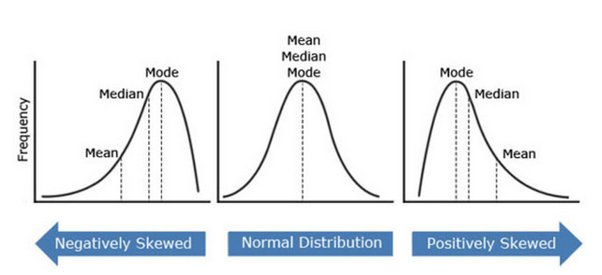

In this exploration of skewness, we will delve into its various forms and implications. From positively-skewed distributions with elongated tails on the right to negatively-skewed ones sporting extended tails on the left, we will examine how these taperings, aptly termed "tails," can reveal crucial insights about a dataset's behavior.

Moreover, we will uncover the intriguing relationship between skewness and the central tendency measures: mean, median, and mode. Discover how, in positively skewed data, the mean surpasses the median, while in its negatively skewed counterpart, the mean trails behind the median. And in the realm of symmetric distributions, where balance reigns supreme, witness the rare occurrence where mean, median, and mode align in perfect harmony.

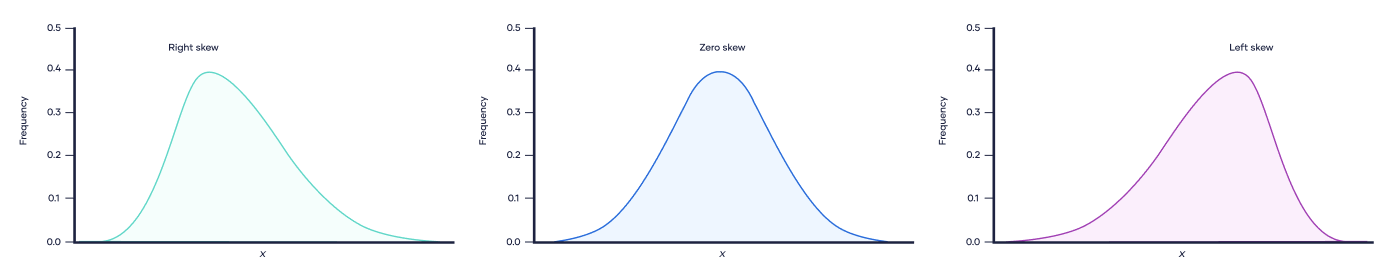


Skewness is like checking if a group of numbers is leaning to one side or not. We use different ways to check, like looking at the middle number and the average. Let's see what these ways tell us about the numbers.

1. Mean and Mode-Based Formula: This formula calculates skewness by comparing the mean (average) and mode (the most frequent value) of the dataset. If the mean is greater than the mode, the data is positively skewed, indicating a longer tail on the right side of the distribution. Conversely, if the mean is less than the mode, the data is negatively skewed, with a longer tail on the left side.

2. Mean and Median-Based Formula: In this approach, skewness is determined by examining the relationship between the mean and the median (the middle value when data is sorted). When the mean is greater than the median, it signifies positive skewness, while a mean less than the median indicates negative skewness.

3. Quartile-Based Formula: Another method employs quartiles (dividing the data into four equal parts) to gauge skewness. If the data is symmetric, the median will be equidistant from the upper and lower quartiles, resulting in a skewness value of zero. However, if the data is skewed, the quartiles will be asymmetrical, leading to a nonzero skewness value.

## PEARSON MEASURE OF SKEWNESS

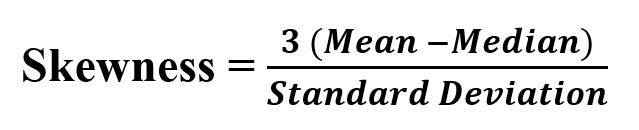

1. Highly Positively Skewed (skewness_value > 1): When the skewness value is greater than 1, it indicates that the data is highly positively skewed. In this scenario, the distribution is significantly skewed to the right, and the tail on the right side of the distribution (higher values) is much longer or heavier than the left side.

2. Positively Skewed (0.5 <= skewness_value <= 1): If the skewness value falls between 0.5 and 1, it suggests that the data is positively skewed. In a positively skewed distribution, the tail on the right side is longer or heavier than the left side, indicating that most data points are concentrated on the left side of the mean.

3. Highly Negatively Skewed (skewness_value < -1): When the skewness value is less than -1, it signifies that the data is highly negatively skewed. In this case, the distribution is significantly skewed to the left, and the tail on the left side of the distribution (lower values) is much longer or heavier than the right side.

4. Negatively Skewed (-1 <= skewness_value <= -0.5): If the skewness value falls between -1 and -0.5, it implies that the data is negatively skewed. In a negatively skewed distribution, the tail on the left side is longer or heavier than the right side, suggesting that most data points are concentrated on the right side of the mean.

5. No Skew (Symmetric Distribution) (else): If the skewness value doesn't fall into any of the above categories, it indicates that the data follows a symmetric distribution. In a symmetric distribution, there is an approximate balance between the left and right sides of the distribution, and the data is roughly centered around its mean. If the Pearson Measure of Skewness falls within the range of -0.5 to 0.5, it indicates that the distribution of the data is almost symmetrical.

In [14]:
class BalanceSkewness:
    """
    Class for calculating and interpreting skewness of a data column.
    
    Parameters:
    - data: DataFrame containing the data.
    - column_name: Name of the column for which skewness will be calculated.
    
    Note: If this value is between:
    · -0.5 and 0.5, the distribution of the value is almost symmetrical
    · -1 and -0.5, the data is negatively skewed, and if it is between 0.5 to 1, the data is positively skewed.
    · If the skewness is lower than -1 (negatively skewed) or greater than 1 (positively skewed), the data is highly skewed.
    """
    def __init__(self, data, column_name):
        self.data = data
        self.column_name = column_name
        
    def calculate_skewness(self):
        #skewness using Pearson’s median skewness formula
        mean = self.data[self.column_name].mean()
        median = self.data[self.column_name].median()
        mode = self.data[self.column_name].mode().iloc[0]  # Get the first mode if it exists
        print('Mean: ',mean)
        print('Median: ',median)
        print('Mode: ',mode)
        
        #skewness using the Pearson's median formula
        pearson_skewness = (3 * (mean - median)) / self.data[self.column_name].std()
        return pearson_skewness

    def interpret_skewness(self, skewness_value):
        #skewness based on your conditions
        if skewness_value > 1:
            skewness_result = "Highly positively skewed"
            print("Interpretation of skewness:", skewness_result)
        elif 0.5 <= skewness_value <= 1:
            skewness_result = "Positively skewed"
            print("Interpretation of skewness:", skewness_result)
        elif skewness_value < -1:
            skewness_result = "Highly negatively skewed"
            print("Interpretation of skewness:", skewness_result)
        elif -1 <= skewness_value <= -0.5:
            skewness_result = "Negatively skewed"
            print("Interpretation of skewness:", skewness_result)
        else:
            skewness_result = "No skew (symmetric distribution)"
            print("Interpretation of skewness:", skewness_result)
        
        return skewness_result

    def analyse_skewness(self):
        #skewness using Pearson's median skewness formula
        pearson_skewness = self.calculate_skewness()

        # Interpret the skewness
        self.interpret_skewness(pearson_skewness)
        
        print(f'Pearson Skewness : {pearson_skewness}')

## BOWLEYS COEFFICIENT OF SKEWNESS

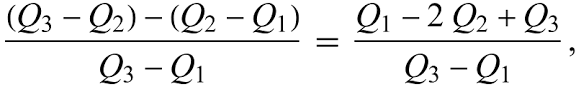

In [17]:
class BowleysCoefficientSkewness:
    def __init__(self, data):
        self.data = data

    def calculate_skewness(self):
        data_sorted = np.sort(self.data)
        n = len(data_sorted)
        q1 = data_sorted[int(n * 0.25)]
        q2 = data_sorted[int(n * 0.5)]
        q3 = data_sorted[int(n * 0.75)]
        iqr = q3 - q1

        bowleys_coefficient = (q1 + q3 - 2 * q2) / iqr
        return bowleys_coefficient

    def interpret_skewness(self, bowleys_coefficient, sample_size):
        #the tolerance based on the sample size
        tolerance = 1e-0 / np.sqrt(sample_size)
        
        if np.isclose(bowleys_coefficient, 0, atol=tolerance):
            skewness_result = "Symmetric (no skew)"
        elif bowleys_coefficient > 0:
            skewness_result = "Positively skewed"
        else:
            skewness_result = "Negatively skewed"
        return skewness_result

    def analyse_skewness(self):
        bowleys_coefficient = self.calculate_skewness()
        sample_size = len(self.data)
        skewness_result = self.interpret_skewness(bowleys_coefficient, sample_size)
        print(f"Bowley's Coefficient of Skewness: {bowleys_coefficient}")
        print("Interpretation of skewness:", skewness_result)
        return bowleys_coefficient

## SKEWNESS BASED ON THE THIRD MOMENT

#### To calculate skewness based on the third moment:

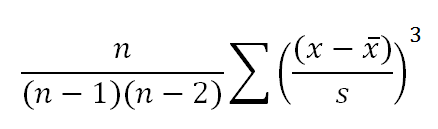

#### 1. Calculate the Mean (μ)

#### 2. Calculate the Standard Deviation (σ)

#### 3. Calculate the Third Moment (M3): Calculate the third moment of the distribution, which is the average of the cubed deviations from the mean:

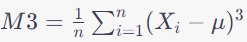

Xi: is each data point in your dataset.

μ: is the mean of the dataset.

n: is the total number of data points.

#### 4. Calculate Skewness (Sk): Finally, calculate the skewness using the third moment:

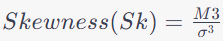

M3 is the third moment
and σ is the standard deviation 

#### 5. Interpret the Skewness:

If Skewness (Sk) is greater than 1.0, it indicates substantial positive skewness, meaning the distribution is skewed to the right.

If Skewness (Sk) is less than -1.0, it indicates substantial negative skewness, meaning the distribution is skewed to the left.

If Skewness (Sk) is close to zero, it suggests a symmetric distribution (near perfect symmetry).

In [30]:
class ThirdMomentSkewness:
    '''
    If Skewness (Sk) is greater than 1.0, it indicates substantial positive skewness, meaning the distribution is skewed to the right.
    If Skewness (Sk) is less than -1.0, it indicates substantial negative skewness, meaning the distribution is skewed to the left.
    If Skewness (Sk) is close to zero, it suggests a symmetric distribution (near perfect symmetry).
    '''
    
    def __init__(self, data, column_name):
        self.data = data
        self.column_name = column_name

    def calculate_skewness(self):
        #specified column from the DataFrame
        column_data = self.data[self.column_name]

        #mean (μ)
        mean = np.mean(column_data)

        # standard deviation (σ)
        std_dev = np.std(column_data)

        # Calculate the third moment (M3)
        n = len(column_data)
        third_moment = sum((x - mean) ** 3 for x in column_data) / n

        # Calculate skewness (Sk)
        skewness = third_moment / (std_dev ** 3)
        return skewness

    def interpret_skewness(self, skewness_value):
        if skewness_value > 1.0:
            skewness_result = "Highly positively skewed"
        elif skewness_value < -1.0:
            skewness_result = "Highly negatively skewed"
        else:
            skewness_result = "No skew (symmetric distribution)"
        return skewness_result

    def analyse_skewness(self):
        #skewness based on the third moment
        skewness = self.calculate_skewness()

        # Interpret the skewness
        skewness_result = self.interpret_skewness(skewness)
        
        print(f'Skewness based on the third moment for column "{self.column_name}": {skewness}')
        print("Interpretation of skewness:", skewness_result)


## 2. CREATING SYMMETRIC DATA & PLOT 

In [32]:
#the parameters for the symmetric distribution
mean = 0
std_dev = 1
sample_size = 10000

# Generate random data following a standard normal distribution (zero skew)
symmetric_data = np.random.normal(mean, std_dev, sample_size)
df = pd.DataFrame({'Column_Name': symmetric_data})

In [33]:
mu, sigma = norm.fit(df['Column_Name'])

In [34]:
x = np.linspace(min(df['Column_Name']), max(df['Column_Name']))

In [35]:
pdf = norm.pdf(x, mu, sigma)

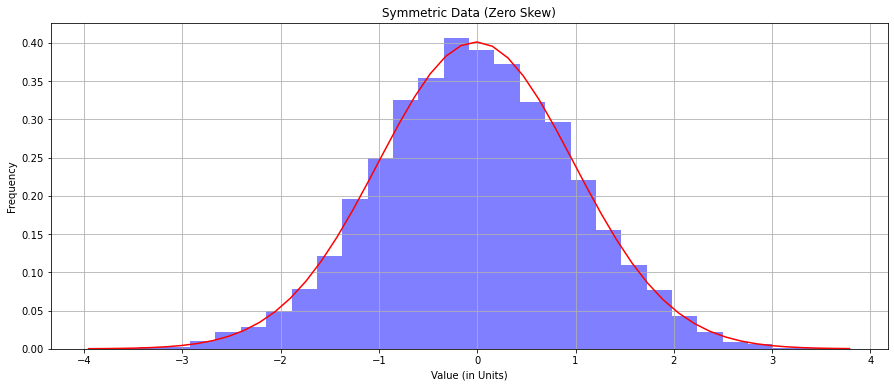

In [36]:
# Plot the symmetric data
plt.figure(figsize=(15, 6))
plt.hist(symmetric_data, bins=30, density=True, alpha=0.5, color='blue')
plt.plot(x, pdf, color = 'red')
plt.title('Symmetric Data (Zero Skew)')
plt.grid(True)
plt.xlabel('Value (in Units)')
plt.ylabel('Frequency')
plt.show()

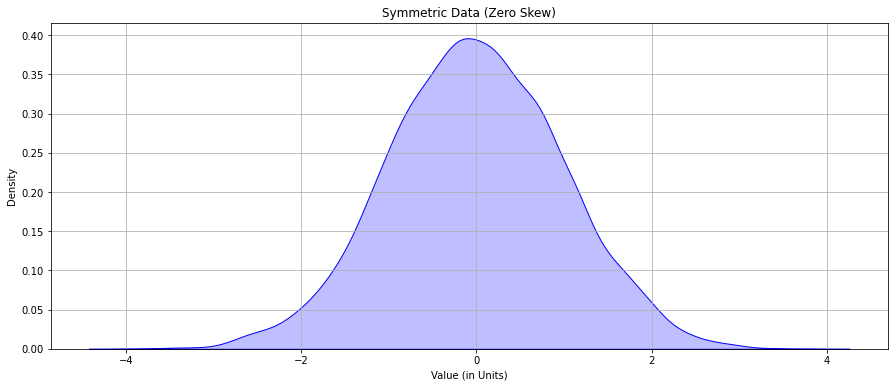

In [37]:
plt.figure(figsize=(15, 6))
sns.kdeplot(symmetric_data, shade=True, color='blue')
plt.title('Symmetric Data (Zero Skew)')
plt.xlabel('Value (in Units)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

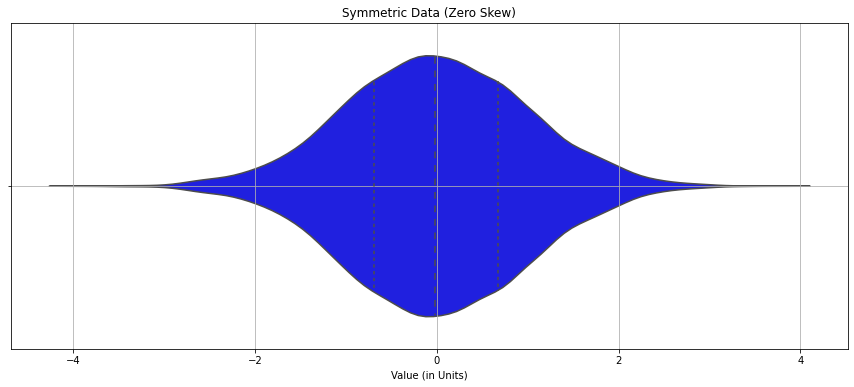

In [38]:
plt.figure(figsize=(15, 6))
sns.violinplot(x=symmetric_data, color='blue', inner='quartile')
plt.title('Symmetric Data (Zero Skew)')
plt.xlabel('Value (in Units)')
plt.grid(True)
plt.show()

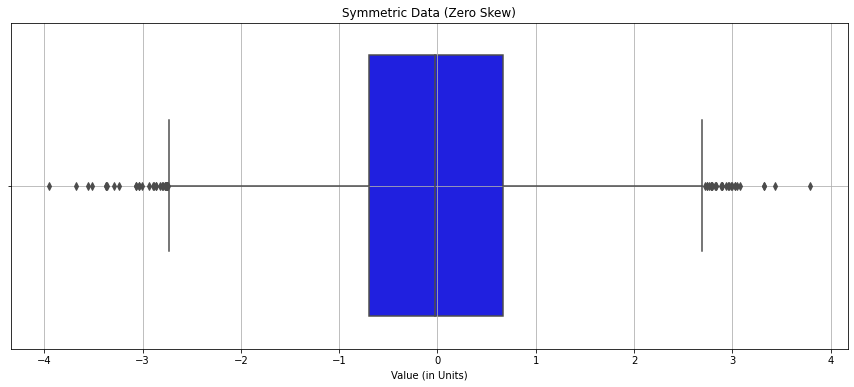

In [39]:
plt.figure(figsize=(15, 6))
sns.boxplot(x=symmetric_data, color='blue')
plt.title('Symmetric Data (Zero Skew)')
plt.xlabel('Value (in Units)')
plt.grid(True)
plt.show()

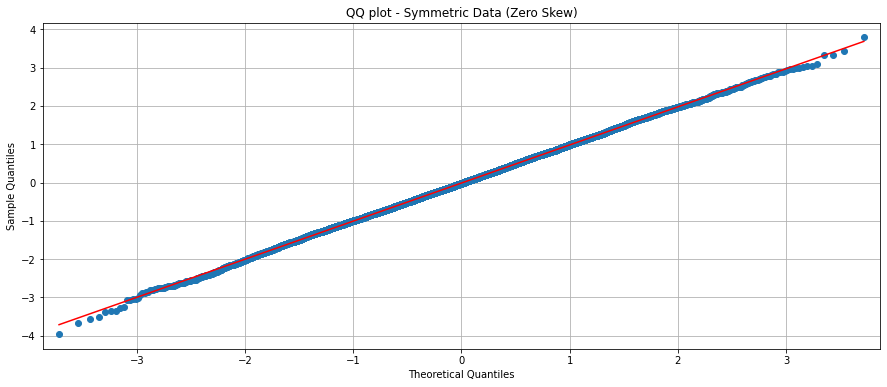

In [40]:
fig, ax = plt.subplots(figsize=(15, 6))
sm.qqplot(symmetric_data, line='s', ax=ax)
plt.title('QQ plot - Symmetric Data (Zero Skew)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

In [41]:
skewness_calculator = BalanceSkewness(df, 'Column_Name')
skewness_calculator.analyse_skewness()

Mean:  -0.013160855499312845
Median:  -0.020028694715957553
Mode:  -3.954405656760867e+00
Interpretation of skewness: No skew (symmetric distribution)
Pearson Skewness : 0.020716534792196716


In [42]:
#an instance of BowleysCoefficientSkewness with the correct column name
skewness_calculator = BowleysCoefficientSkewness(df['Column_Name'])
#Bowley's Coefficient of Skewness and interpret it
skewness = skewness_calculator.analyse_skewness()

Bowley's Coefficient of Skewness: 0.011088855869624178
Interpretation of skewness: Positively skewed


In [43]:
#an instance of the ThirdMomentSkewness class and analyze skewness
skewness_analyzer = ThirdMomentSkewness(df, 'Column_Name')
skewness_analyzer.analyse_skewness()

Skewness based on the third moment for column "Column_Name": -0.010153469966114903
Interpretation of skewness: No skew (symmetric distribution)


## 3. POSITIVE OR RIGHT SKEW

In [45]:
mean = 0
std_dev = 1
sample_size = 10000
data_normal = np.random.normal(mean, std_dev, sample_size)

#transformation to create right skew
right_skewed_data = np.exp(data_normal)
df_right = pd.DataFrame({'Column_Name': right_skewed_data})

In [46]:
mu_right, sigma_right = norm.fit(df_right['Column_Name'])

In [47]:
x_right = np.linspace(min(df_right['Column_Name']), max(df_right['Column_Name']))

In [48]:
pdf_right = norm.pdf(x_right, mu_right, sigma_right)

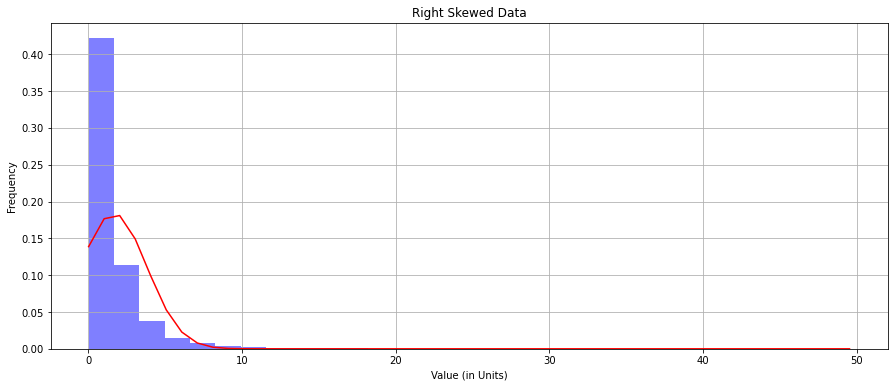

In [49]:
# Plot the right skewed data
plt.figure(figsize=(15,6))
plt.hist(right_skewed_data, bins=30, density=True, alpha=0.5, color='blue')
plt.plot(x_right, pdf_right, color = 'red')
plt.title('Right Skewed Data')
plt.grid(True)
plt.xlabel('Value (in Units)') 
plt.ylabel('Frequency')
plt.show()

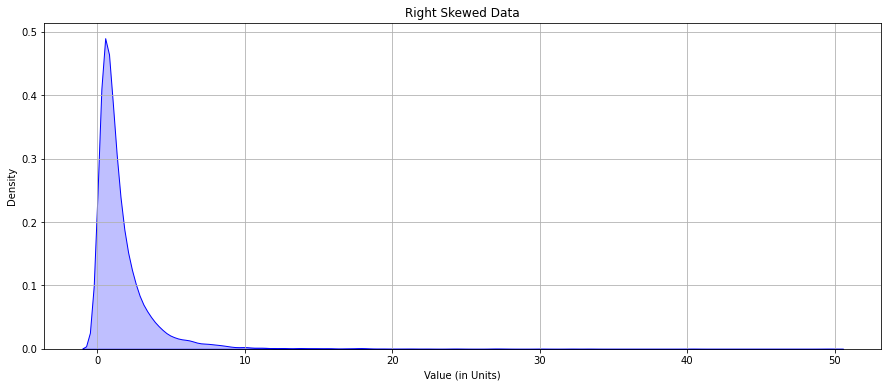

In [50]:
plt.figure(figsize=(15, 6))
sns.kdeplot(right_skewed_data, shade=True, color='blue')
plt.title('Right Skewed Data')
plt.xlabel('Value (in Units)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

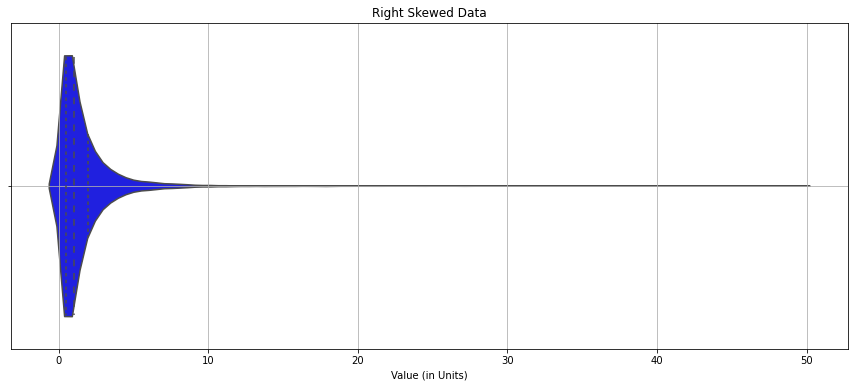

In [51]:
plt.figure(figsize=(15, 6))
sns.violinplot(x=right_skewed_data, color='blue', inner='quartile')
plt.title('Right Skewed Data')
plt.xlabel('Value (in Units)')
plt.grid(True)
plt.show()

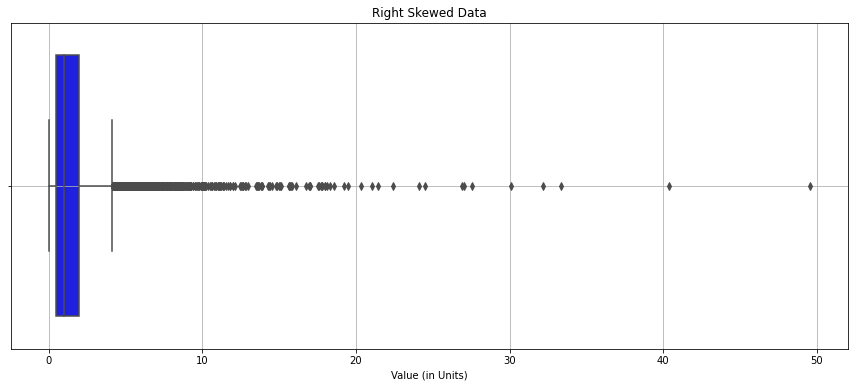

In [52]:
plt.figure(figsize=(15, 6))
sns.boxplot(x=right_skewed_data, color='blue')
plt.title('Right Skewed Data')
plt.xlabel('Value (in Units)')
plt.grid(True)
plt.show()

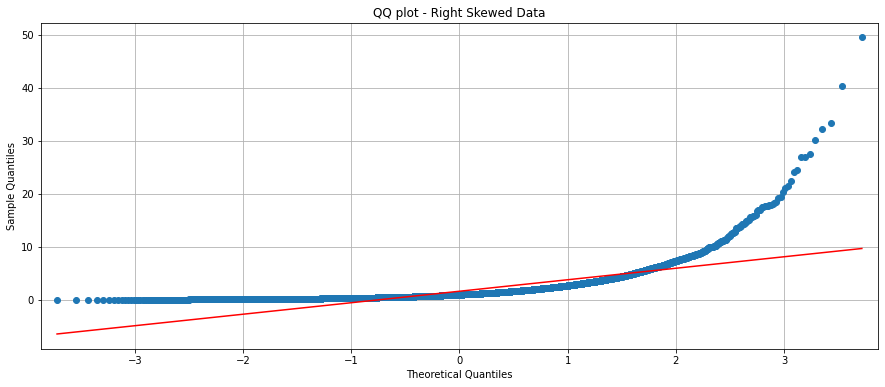

In [53]:
fig, ax = plt.subplots(figsize=(15, 6))
sm.qqplot(right_skewed_data, line='s', ax=ax)
plt.title('QQ plot - Right Skewed Data')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

In [54]:
#an instance of BalanceSkewness with the correct column name
skewness_calculator = BalanceSkewness(df_right, 'Column_Name')
skewness_calculator.analyse_skewness()

Mean:  1.6413458005317647
Median:  0.9969882968050416
Mode:  1.3362135905213386e-02
Interpretation of skewness: Positively skewed
Pearson Skewness : 0.891457467021265


In [55]:
#an instance of BowleysCoefficientSkewness with the correct column name
skewness_calculator = BowleysCoefficientSkewness(df_right['Column_Name'])
#Bowley's Coefficient of Skewness and interpret it
skewness = skewness_calculator.analyse_skewness()

Bowley's Coefficient of Skewness: 0.32303489367091015
Interpretation of skewness: Positively skewed


In [56]:
#an instance of the BalanceSkewness class and analyze skewness
skewness_analyzer = ThirdMomentSkewness(df_right, 'Column_Name')
skewness_analyzer.analyse_skewness()

Skewness based on the third moment for column "Column_Name": 5.746593633099374
Interpretation of skewness: Highly positively skewed


## 4. NEGATIVE OR LEFT SKEW

In [58]:
mean = 0
std_dev = 1
sample_size = 10000
data_normal = np.random.normal(mean, std_dev, sample_size)

#transformation to create left skew
left_skewed_data = -1 / np.exp(data_normal)
df_left = pd.DataFrame({'Column_Name': left_skewed_data})

In [59]:
mu_left, sigma_left = norm.fit(df_left['Column_Name'])

In [60]:
x_left = np.linspace(min(df_left['Column_Name']), max(df_left['Column_Name']))

In [61]:
pdf_left = norm.pdf(x_left, mu_left, sigma_left)

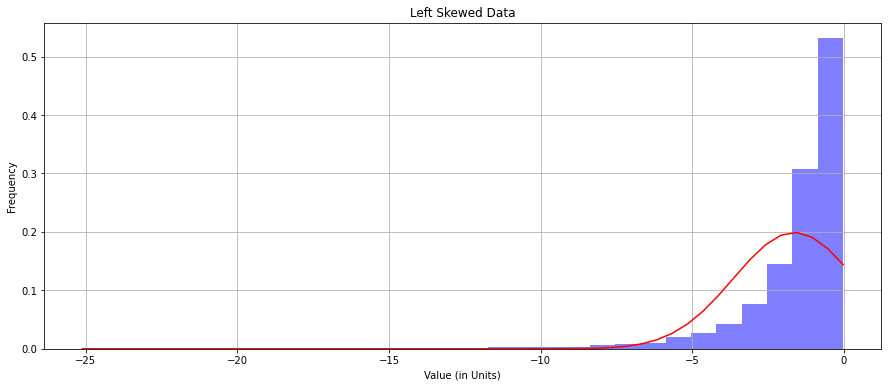

In [62]:
# Plot the right skewed data
plt.figure(figsize=(15,6))
plt.hist(left_skewed_data, bins=30, density=True, alpha=0.5, color='blue')
plt.plot(x_left, pdf_left, color = 'red')
plt.title('Left Skewed Data')
plt.grid(True)
plt.xlabel('Value (in Units)') 
plt.ylabel('Frequency')
plt.show()

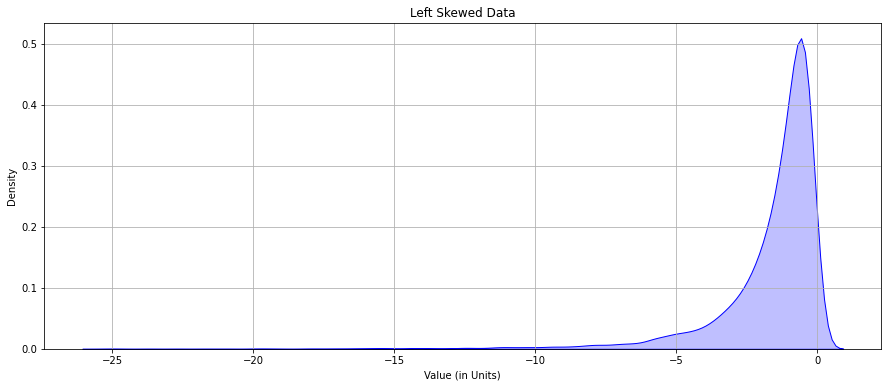

In [63]:
plt.figure(figsize=(15, 6))
sns.kdeplot(left_skewed_data, shade=True, color='blue')
plt.title('Left Skewed Data')
plt.xlabel('Value (in Units)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

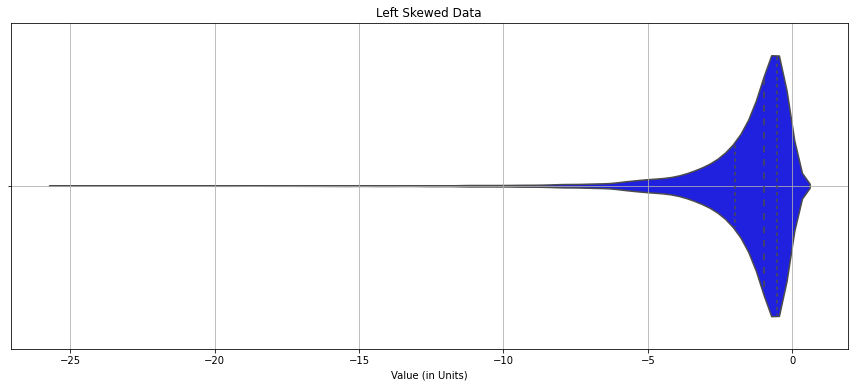

In [64]:
plt.figure(figsize=(15, 6))
sns.violinplot(x=left_skewed_data, color='blue', inner='quartile')
plt.title('Left Skewed Data')
plt.xlabel('Value (in Units)')
plt.grid(True)
plt.show()

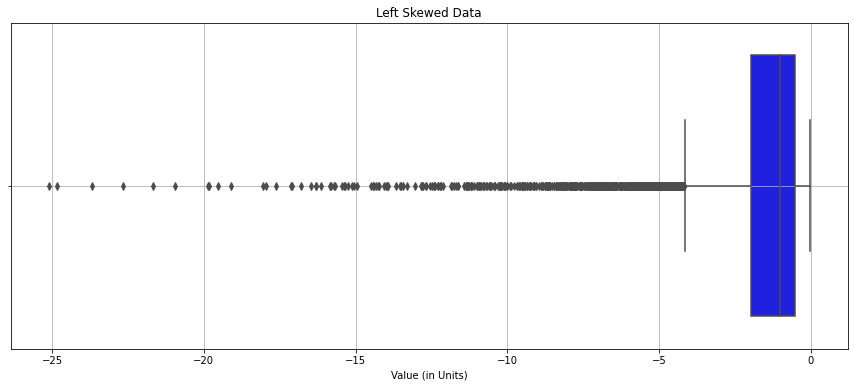

In [65]:
plt.figure(figsize=(15, 6))
sns.boxplot(x=left_skewed_data, color='blue')
plt.title('Left Skewed Data')
plt.xlabel('Value (in Units)')
plt.grid(True)
plt.show()

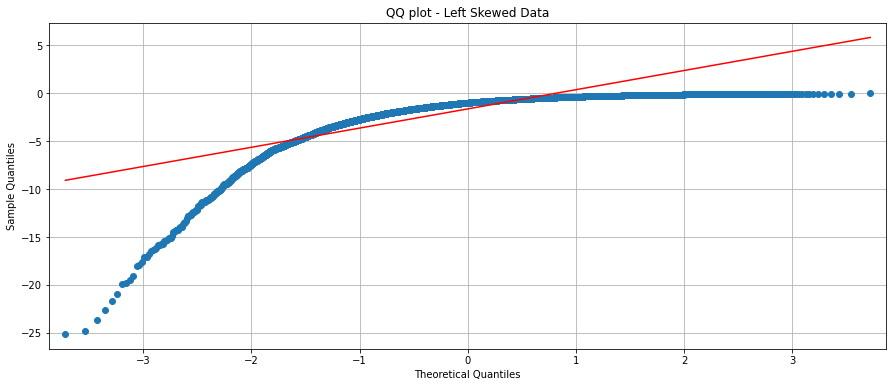

In [66]:
fig, ax = plt.subplots(figsize=(15, 6))
sm.qqplot(left_skewed_data, line='s', ax=ax)
plt.title('QQ plot - Left Skewed Data')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

In [67]:
#an instance of BalanceSkewness with the correct column name
skewness_calculator = BalanceSkewness(df_left, 'Column_Name')
skewness_calculator.analyse_skewness()

Mean:  -1.6380980177087208
Median:  -0.9911386156914856
Mode:  -2.51167287443237e+01
Interpretation of skewness: Negatively skewed
Pearson Skewness : -0.9688990681540405


In [68]:
skewness_calculator = BowleysCoefficientSkewness(df_left['Column_Name'])
interpretation = skewness_calculator.analyse_skewness()

Bowley's Coefficient of Skewness: -0.3494461932847193
Interpretation of skewness: Negatively skewed


In [69]:
#an instance of the BalanceSkewness class and analyze skewness
skewness_analyzer = ThirdMomentSkewness(df_left, 'Column_Name')
skewness_analyzer.analyse_skewness()

Skewness based on the third moment for column "Column_Name": -3.7948446973557632
Interpretation of skewness: Highly negatively skewed


## REFERENCES: 

"Descriptive Statistics: Skewness and Kurtosis" from Digitaschools:
Source: https://digitaschools.com/descriptive-statistics-skewness-and-kurtosis/

"Skewness Formula" from GeeksforGeeks:
Source: https://www.geeksforgeeks.org/skewness-formula/

"Everything You Should Know About Skewness" on Medium by Dhaval Sony:
Source: https://medium.com/@dhaval.sony.504/everything-you-should-know-about-skewness-c5edf381cc6d

"Quantile Skewness" from SAS Blogs:
Source: https://blogs.sas.com/content/iml/2017/07/19/quantile-skewness.html

"Theoretical Quantile-Quantile (QQ) Plot" by Michael G. Imond:
Source: http://mgimond.github.io/ES218/theoretical_qq.html